In [1]:
pip install pandas statsmodels matplotlib


Note: you may need to restart the kernel to use updated packages.


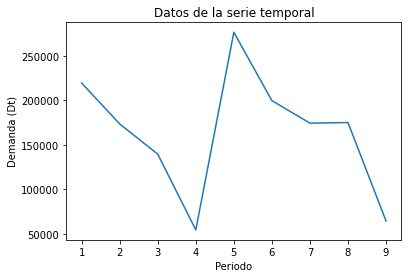

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Tus datos
data = {'Periodo': [1, 2, 3, 4, 5, 6, 7, 8, 9],
        'Dt': [219375.38, 173385.6, 139459.28, 54307.1, 276454.52, 
               199576, 174310.65, 174951.08, 64375.3]}

df = pd.DataFrame(data)

# Graficar los datos
plt.plot(df['Periodo'], df['Dt'])
plt.title('Datos de la serie temporal')
plt.xlabel('Periodo')
plt.ylabel('Demanda (Dt)')
plt.show()


In [3]:
from statsmodels.tsa.stattools import adfuller

# Prueba ADF para estacionariedad
result = adfuller(df['Dt'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Un p-value bajo (< 0.05) indica que la serie es estacionaria


ADF Statistic: -2.6091554772608005
p-value: 0.09111974209530155


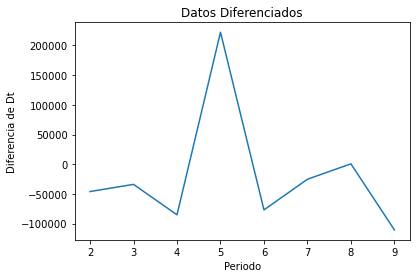

In [4]:
df['Dt_diff'] = df['Dt'].diff().dropna()

# Graficar la serie diferenciada
plt.plot(df['Periodo'][1:], df['Dt_diff'][1:])
plt.title('Datos Diferenciados')
plt.xlabel('Periodo')
plt.ylabel('Diferencia de Dt')
plt.show()


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA
model = ARIMA(df['Dt'], order=(1, 1, 1))
model_fit = model.fit()

# Mostrar el resumen del modelo ajustado
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                     Dt   No. Observations:                    9
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -101.523
Date:                Tue, 03 Sep 2024   AIC                            209.046
Time:                        20:54:53   BIC                            209.284
Sample:                             0   HQIC                           207.439
                                  - 9                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0174      0.592      0.029      0.977      -1.143       1.178
ma.L1         -0.9313      0.935     -0.996      0.319      -2.763       0.901
sigma2       5.97e+09   8.83e-11   6.76e+19      0.0

In [6]:
# Pronosticar los próximos 3 periodos
forecast = model_fit.forecast(steps=3)

print("Predicciones para los próximos 3 periodos:")
print(forecast)


Predicciones para los próximos 3 periodos:
9     145817.854483
10    147237.650172
11    147262.401603
Name: predicted_mean, dtype: float64


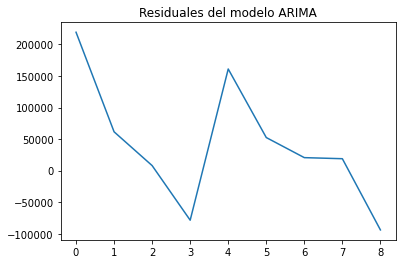

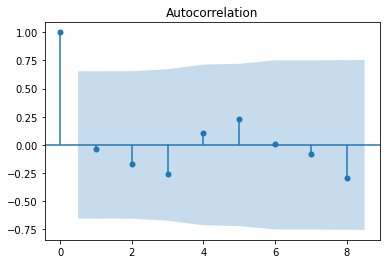

In [7]:
# Graficar los residuales
residuals = model_fit.resid
plt.plot(residuals)
plt.title('Residuales del modelo ARIMA')
plt.show()

# Graficar el ACF de los residuales
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Definir el DataFrame
data = {'Periodo': [1, 2, 3, 4, 5, 6, 7, 8, 9],
        'Dt': [219375.38, 173385.6, 139459.28, 54307.1, 276454.52, 
               199576, 174310.65, 174951.08, 64375.3]}

df = pd.DataFrame(data)

# Ajustar el modelo ARIMA
model = ARIMA(df['Dt'], order=(1, 1, 1))
model_fit = model.fit()

# Obtener los valores reales y los pronosticados
real_values = df['Dt']  # Los valores reales
predicted_values = model_fit.predict(start=1, end=len(df))  # Los valores pronosticados

# Calcular el error (residuales)
errors = real_values - predicted_values

# Calcular MAD (Mean Absolute Deviation)
MAD = np.mean(np.abs(errors))
print(f'MAD: {MAD}')

# Calcular MAPE (Mean Absolute Percentage Error)
MAPE = np.mean(np.abs(errors / real_values)) * 100
print(f'MAPE: {MAPE}%')

# Calcular TSt (Tracking Signal)
cum_error = np.cumsum(errors)
TSt = cum_error / MAD
print(f'TSt: {TSt}')


MAD: 61877.001343427495
MAPE: 54.89312902224237%
TSt: 0         NaN
1    0.993723
2    1.121889
3   -0.148872
4    2.454594
5    3.301642
6    3.633767
7    3.938415
8    2.418352
9         NaN
dtype: float64
